In [8]:
import pathlib
import matplotlib.pyplot as plt
import torch
import utils
import time
import typing
import collections
from torch import nn
from dataloaders import load_cifar10

In [9]:
from task2 import compute_loss_and_accuracy, ExampleModel, Trainer, create_plots

Files already downloaded and verified
Files already downloaded and verified
ExampleModel(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=2048, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)
Epoch:  0	Batches per seconds: 108.89	Global step:    352	Validation Loss: 1.62,	Validation Accuracy: 39.990
Epoch:  0	Batches per seconds: 100.73	Global step:    704	Validat

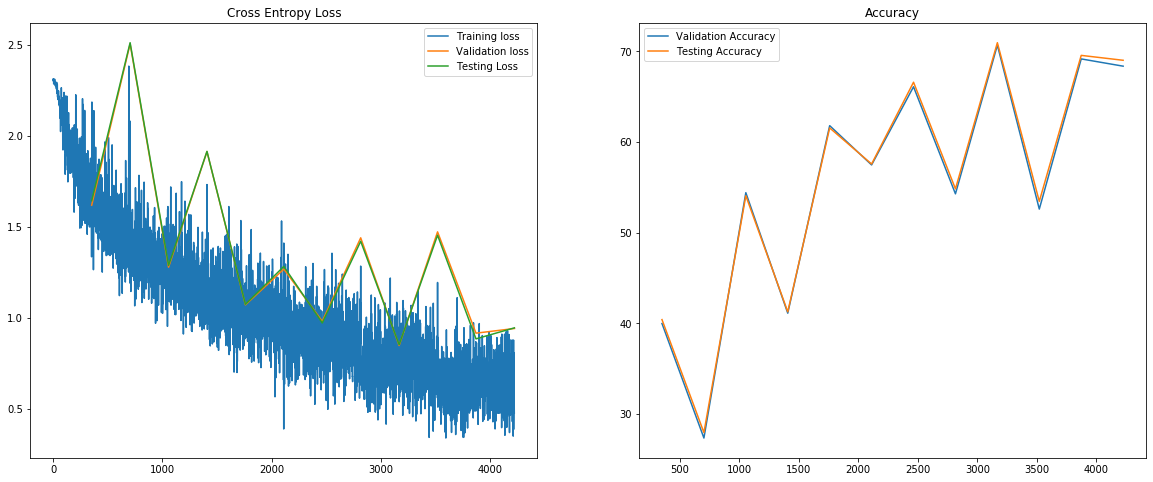

In [16]:
epochs = 10
batch_size = 64
learning_rate = 5e-2
early_stop_count = 4
dataloaders = load_cifar10(batch_size)
model = ExampleModel(image_channels=3, num_classes=10)
trainer = Trainer(
    batch_size,
    learning_rate,
    early_stop_count,
    epochs,
    model,
    dataloaders
)
trainer.train()
create_plots(trainer, "task2")

In [17]:
dataloader_train, dataloader_val, dataloader_test = dataloaders
print("Train Accuracy:", compute_loss_and_accuracy(dataloader_train, model, nn.CrossEntropyLoss())[1])
print("Validation Accuracy:", compute_loss_and_accuracy(dataloader_val, model, nn.CrossEntropyLoss())[1])
print("Test Accuracy:", compute_loss_and_accuracy(dataloader_test, model, nn.CrossEntropyLoss())[1])

Train Accuracy: tensor(76.7333, device='cuda:0')
Validation Accuracy: tensor(68.3700, device='cuda:0')
Test Accuracy: tensor(69.0200, device='cuda:0')


## Returning to the best weights does not seem to work properly